# Module 6: Confidence interval and hypothesis testing

## Outline
* Introduction
* Constructing confidence intervals
    - For means (unknown variance)
    - For means (known variance)
        - One tailed/ two tailed
    - For variances
    - For Proportions
* Hypothesis testing
    - For means (unknown variance)
    - For means (known variance)
        - One tailed/ two tailed
    - For variances


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Prelude

Interval estimates (in contrast to point estimates) open a whole range of useful possibilities for statistical inference.
A typical use of confidence intervals is to construct **error bars** around plotted sample statistics in a graphical display.
So we need to know how to construct confidence intervals (C.I.s).


Remember:

* Parameters (e.g. the mean and standard deviation) come in two versions
    - population parameters (typically unknown)
    - sample estimates, i.e. a function of $X$, so itself a random variable. They sometimes wear hats $\hat{\theta}$
    
        - the sample mean $\bar{x}$ is an example of $\hat{\theta}$

* the random batch-to-batch variations of $\hat{\theta}$ can be described using probability distributions    
    - this pdf is sometimes called the *sampling distribution*


<IPython.core.display.Javascript object>


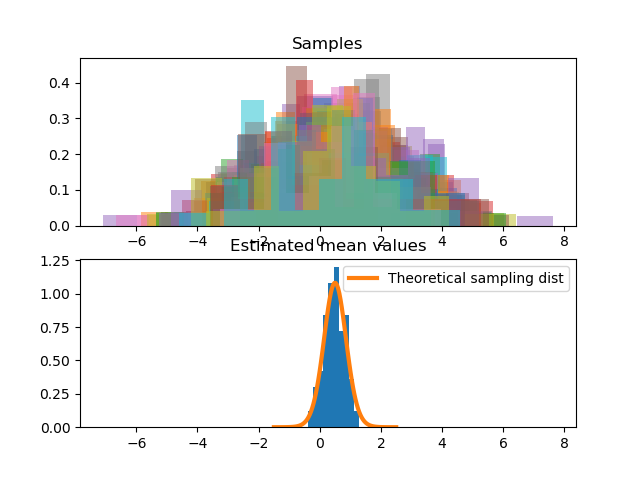

In [4]:
# sampling distribution
np.random.seed(123)

fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.set_title("Samples")
ax2=fig.add_subplot(212, sharex=ax1)
ax2.set_title("Estimated mean values")

population_mean=0.5
popolation_std=2.

sample_size_n=30

n_batches=100


mean_rv1= []
for i in range(n_batches):
    rv1 = np.random.normal(loc=population_mean, scale=popolation_std, size=sample_size_n)
    ax1.hist(rv1, normed = True, alpha=0.5)

    mean_rv1.append(np.mean(rv1))
    
ax2.hist(mean_rv1, normed = True)

x = np.linspace(population_mean-popolation_std,population_mean+popolation_std,100)
ax2.plot(x, stats.t.pdf(x, loc=population_mean, scale=popolation_std/np.sqrt(sample_size_n), df=sample_size_n-1), linewidth=3, label='Theoretical sampling dist')


ax2.legend()

## Definition of a confidence interval

A confidence interval is a range of values that has a specified probability of containing the parameter being estimated. This statement may be written as 
    
$$
\begin{align}
P(L < \theta < U) = 1-\alpha \ \ \ \ \ \ \ (1)
\end{align}
$$

Where:
- $L$ and $U$ are lower and upper confidence limits; $L,U$ are random variables.
- [$L, U$] is the confidence interval (C.I) 
- $\alpha$ is the significance level; this is a probability and the values usually used are:
  $1\%$ ($\alpha=0.01$), $5\%$ ($\alpha=0.05$), or $10\%$ ($\alpha=0.1$).
- $1- \alpha$ is the confidence level, a probability, this is a probability and the values usually
    used are: $99\% \, (1- \alpha=0.99)$, $95\% \, (1 - \alpha=0.95)$, or $90\% \, (1 - \alpha=0.90)$.
- $\alpha$ is adjusted to make the region outside [$L, U$] sufficiently improbable
- $\theta$ is the parameter; this is a constant (i.e. not a random variable).

Equation (1) reads as: the probability that the interval $L$ to $U$ contains $\theta$ is $1-\alpha$.

** Note: ** It is technically NOT correct to read: the probability that $\theta$ is between $L$ and $U$ is $1-\alpha$.
We will get different intervals for different values of the random variable. In the long run, we would expect $1-\alpha$ of these intervals to contain the constant $\theta$. One such interval is $(L, U)$, but we don’t know if our interval belongs to the $1-\alpha$ that contain $\theta$, or to the $\alpha$ that don’t contain $\theta$. And we have no way of determining how likely it is that it’s in either category.


**Moreover: ** A 95% confidence interval does not mean that 95% of the *sample data* lie within the interval.

## Calculation of confidence intervals

Let the probability that the interval $(v_1,v_2)$ includes the variable $V$ be $1-\alpha$:

$$P(v_1 < V < v_2) = 1-\alpha \ \ \ \ \ \ \ (2) $$

### C.I. for the mean of a normal distribution with unknown variance (n small)

Assume that we select randomly a small sample ($n$=small) from a population, and calculate the
mean of the sample ($\bar{x}$). We want to know if the calculated mean is representative of the population mean ($\mu$). Therefore we set the probability of the interval $(\bar{x} - \Delta,\bar{x} + \Delta)$ including $\mu$, and then calculate this interval. $\Delta$ depends on the assumed distribution, significance level and sample's standard deviation.

From (2), let 

$$V = \frac{(\bar{x}-\mu)}{s_{\bar{x}}} \sim T$$

Then $V$ has a **t distribution** with $n-1$ degrees of freedom, which we can use to calculate the "possible range" of this sample statistic. So, we know or assume that this **parametric distribution** is an appropriate representation for the constructed statistic.

$$\begin{align}
    &P(v_1 < \frac{\bar{x}-\mu}{s_{\bar{x}}} < v_2) = 1-\alpha \ \ \ \ (3) \\
    \Rightarrow &P(t_{\frac{\alpha}{2},n-1} < \frac{\bar{x}-\mu}{s_{\bar{x}}} < t_{1-\frac{\alpha}{2},n-1}) = 1-\alpha \\
    \Rightarrow &P(-t_{1-\frac{\alpha}{2},n-1} < \frac{\bar{x}-\mu}{s_{\bar{x}}} < t_{1-\frac{\alpha}{2},n-1}) = 1-\alpha \\
    \Rightarrow &P(\bar{x}-t_{1-\frac{\alpha}{2},n-1}s_{\bar{x}} < \mu < \bar{x}+t_{1-\frac{\alpha}{2},n-1}s_{\bar{x}}) = 1-\alpha
  \end{align}
$$

This latter equation is on the form of (1), so the confidence limits are:

$$\begin{align}
    L &= \bar{x}-t_{1-\frac{\alpha}{2},n-1}s_{\bar{x}} \\
    U &= \bar{x}+t_{1-\frac{\alpha}{2},n-1}s_{\bar{x}} 
  \end{align}
$$

where $t_{1-\frac{\alpha}{2},n-1}$ can be read from t distribution table (note that this relates to the $\Delta$ mentioned above). https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values

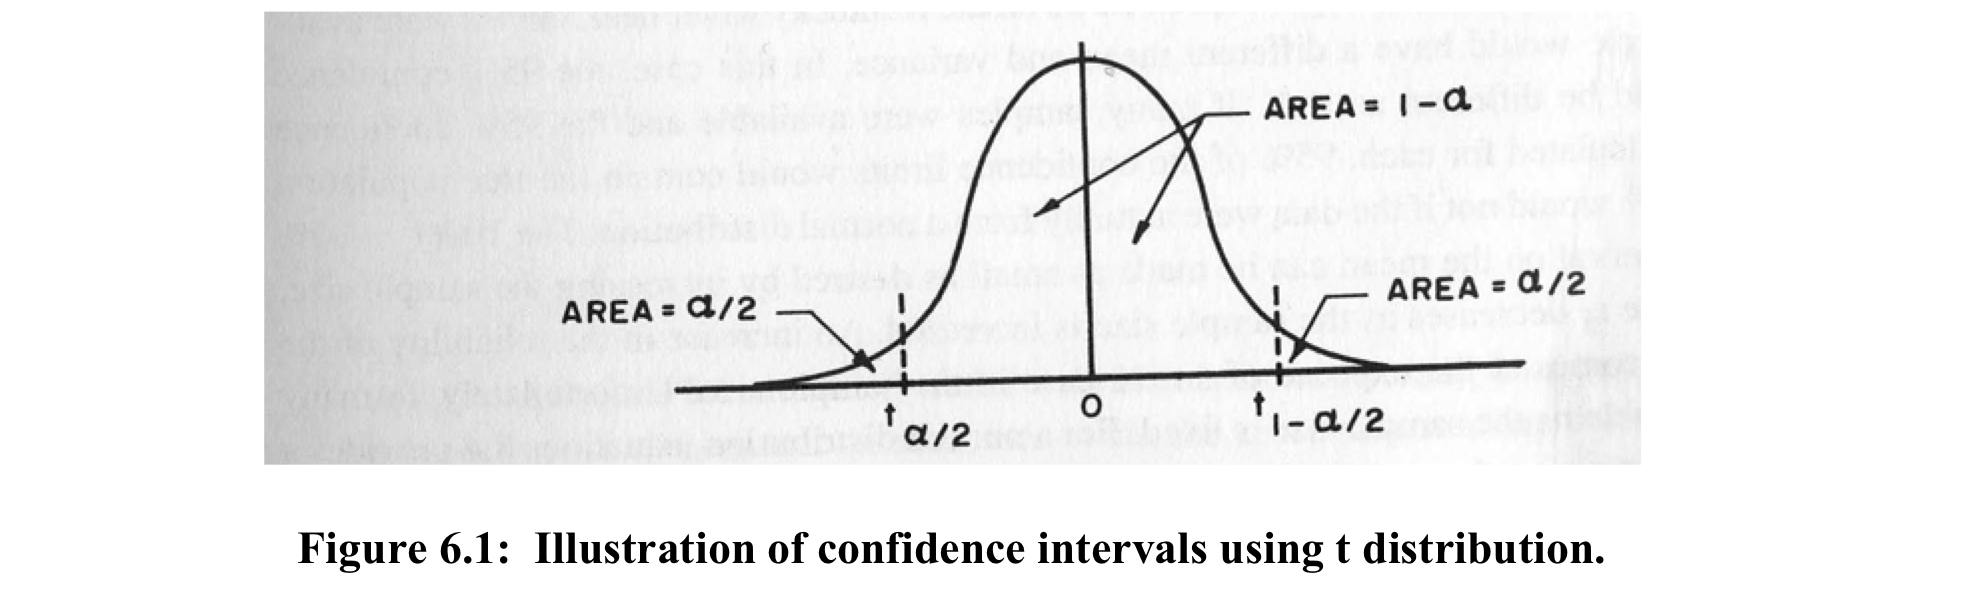

### C.I. for the mean of a normal distribution with known variance (n large)

If the population variance is known or the sample size is large, i.e. $x_i \sim N(\mu,\sigma^2)$, then

$$\bar{x} \sim N(\mu,\sigma_{\bar{x}}^2) = N(\mu,\frac{\sigma^2}{n})$$

The pivotal quantity in (3) becomes $$\frac{(\bar{x}-\mu)}{\sigma_{\bar{x}}},$$ which  has a **standard normal** distribution. The confidence limits become:

$$\begin{align}
    L &= \bar{x}-z_{1-\frac{\alpha}{2}}\sigma_{\bar{x}} \\
    U &= \bar{x}+z_{1-\frac{\alpha}{2}}\sigma_{\bar{x}} 
  \end{align}
$$

where $z_{1-\frac{\alpha}{2}}$ can be read from a standard normal distribution table. https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative

<IPython.core.display.Javascript object>


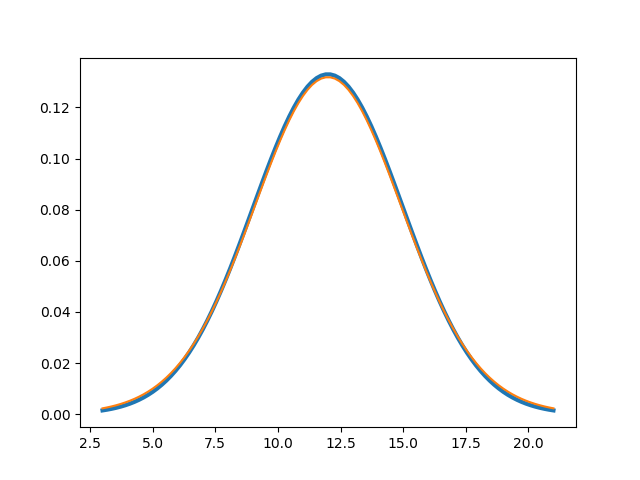

In [6]:
# Normal vs. t distribution
my_mean=12
my_std=3

my_n=30

x = np.linspace(my_mean-3*my_std,my_mean+3*my_std,100)

plt.plot(x, stats.norm.pdf(x, loc=my_mean, scale=my_std), linewidth=3)

plt.plot(x, stats.t.pdf(x, loc=my_mean, scale=my_std, df=my_n-1))

###### Example 6.1

From $99$ years annual discharge data it was calculated that the mean is 66.54 and the standard
deviation is $22.32$. (i.e. $\bar{x} = 66.54$, $s_x = 22.32$)

Calculate the $95\%$ confidence interval for the mean assuming that:

(a) the true variance is unknown

(b) the true variance is known as $(22.32)^2$

###### Solution

(a) $s_{\bar{x}} = \frac{s_x}{\sqrt{n}} = \frac{22.32}{\sqrt{99}} = 2.243$

From the t table we get $t_{1 − \alpha/2 , n−1} = t_{0.975,98} = 1.99$

From equation 5:
$$\begin{align}
    L &= \bar{x} − t_{1 − \alpha/2,n−1}s_{\bar{x}} = 66.54 − 1.99(2.243) = 62.076 \\
    U &= \bar{x} + t_{1 − \alpha/2,n−1}s_{\bar{x}} = 66.54 + 1.99(2.243) = 71.004
 \end{align}
$$

Thus, we say we are $95\%$ confident that interval $62.076$ to $71.004$ contains the true population
mean.

(b) $\sigma_{\bar{x}} = \frac{s_x}{\sqrt{n}} = \frac{22.32}{\sqrt{99}} = 2.243$

From the Z table we $z_{1-\alpha/2} = z_{0.975} = 1.96$

From equation 6:
$$\begin{align}
    L &= \bar{x} − z_{1-\alpha/2}\sigma_{\bar{x}} = 66.54 − 1.96(2.243) = 62.144 \\
    U &= \bar{x} + z_{1-\alpha/2}\sigma_{\bar{x}} = 66.54 + 1.96(2.243) = 70.911
 \end{align}
$$

Thus, we say we are $95\%$ confident that interval $62.144$ to $70.911$ contains the true population
mean.


> **Question:** Suppose you construct a 95% confidence interval from a random sample of size $n = 20$ with sample mean $\bar{x} = 100$ taken from a population with unknown mean $\mu$ and known standard deviation $\sigma=10$. You would like to narrow the confidence interval as it is fairly wide. Which of the following conditions would NOT lead to a narrower confidence interval?
   * (a) If you decreased your confidence level
   * (b) If you increased your sample size
   * (c) If the sample mean was smaller
   * (d) If the population standard deviation was smaller

### One-sided confidence intervals

Sometimes one is only interested in an interval estimate on one side of a parameter. Then
equation (1) becomes:

$$P(L<\theta) = 1-\alpha $$

Following the same procedure we get,

$$L = \bar{x}-t_{1-\alpha,n-1}s_{\bar{x}}$$

The analogous results would hold for any one-sided, lower or upper confidence limit.

### C.I. for the *variance* of a Normal distribution

We know that if $x_i \sim N(\mu,\sigma^2)$ then the quantity $\sum_{i=1}^n \frac{(x_i - \bar{x})^2}{\sigma^2}$ has a Chi-square distribution (Lecture 4). Then:

$$\sum_{i=1}^n \frac{(x_i - \bar{x})^2}{\sigma_x^2} = \frac{n-1}{\sigma_x^2} \sum_{i=1}^n\frac{(x_i - \bar{x})^2}{n-1} = (n-1) \frac{s_x^2}{\sigma_x^2}$$

Letting this quantity equal V in (3) results in:

$$P(v_1 < \frac{(n-1)s_x^2}{\sigma_x^2} < v_2) = 1-\alpha $$

Since we have Chi-square distribution, choose $v_1$ equal $\chi_{\alpha/2,n−1}^2$ and $v_2$ equal $\chi_{1−\alpha/2,n-1}^2$. Then:

$$P(\chi_{\alpha/2,n−1}^2 < \frac{(n-1)s_x^2}{\sigma_x^2} < \chi_{1−\alpha/2,n-1}^2) = 1-\alpha  $$

$$\Rightarrow P(\frac{(n-1)s_x^2}{\chi_{1−\alpha/2,n-1}^2} < \sigma_x^2 < \frac{(n-1)s_x^2}{\chi_{\alpha/2,n−1}^2}) = 1-\alpha $$

which is in form of (1) and the confidence limits on $\sigma^2$ are:
$$\begin{align}
    L &= \frac{(n-1)s_x^2}{\chi_{1−\alpha/2,n-1}^2}  \\
    U &= \frac{(n-1)s_x^2}{\chi_{\alpha/2,n−1}^2}
 \end{align}
$$

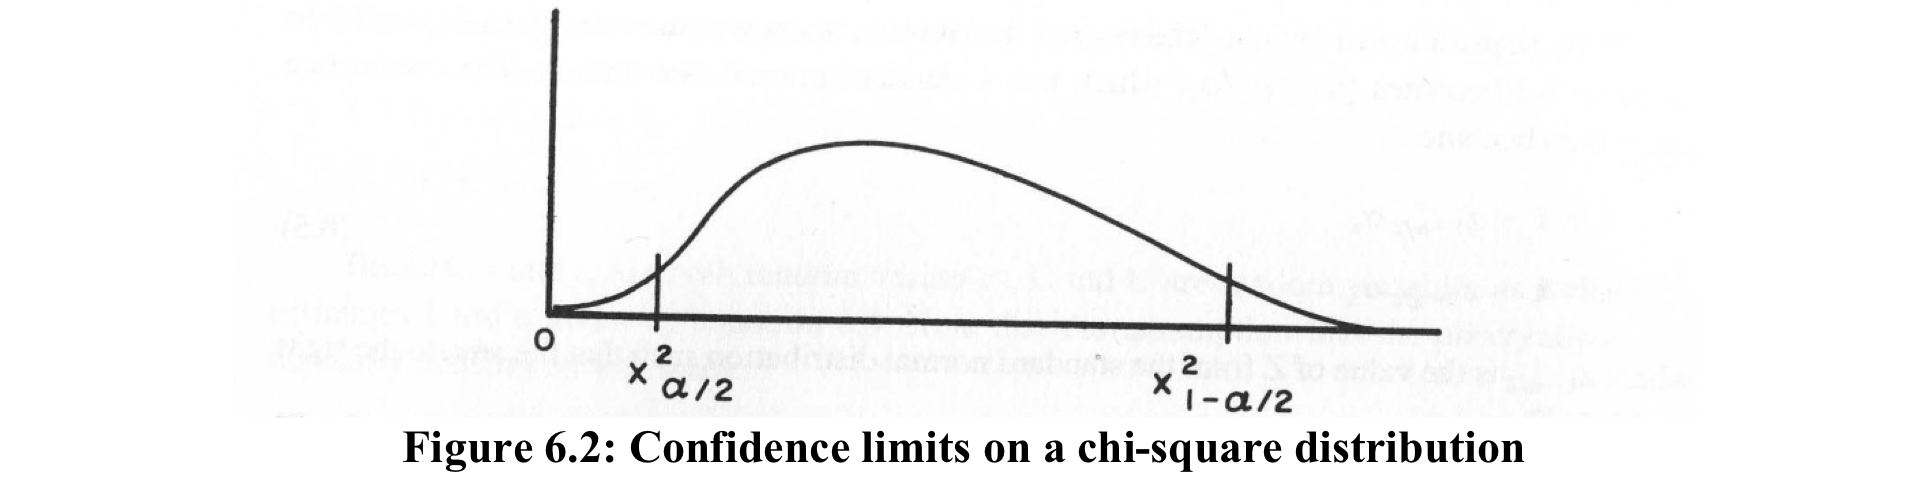

The beginning of the table in the compendium appendix
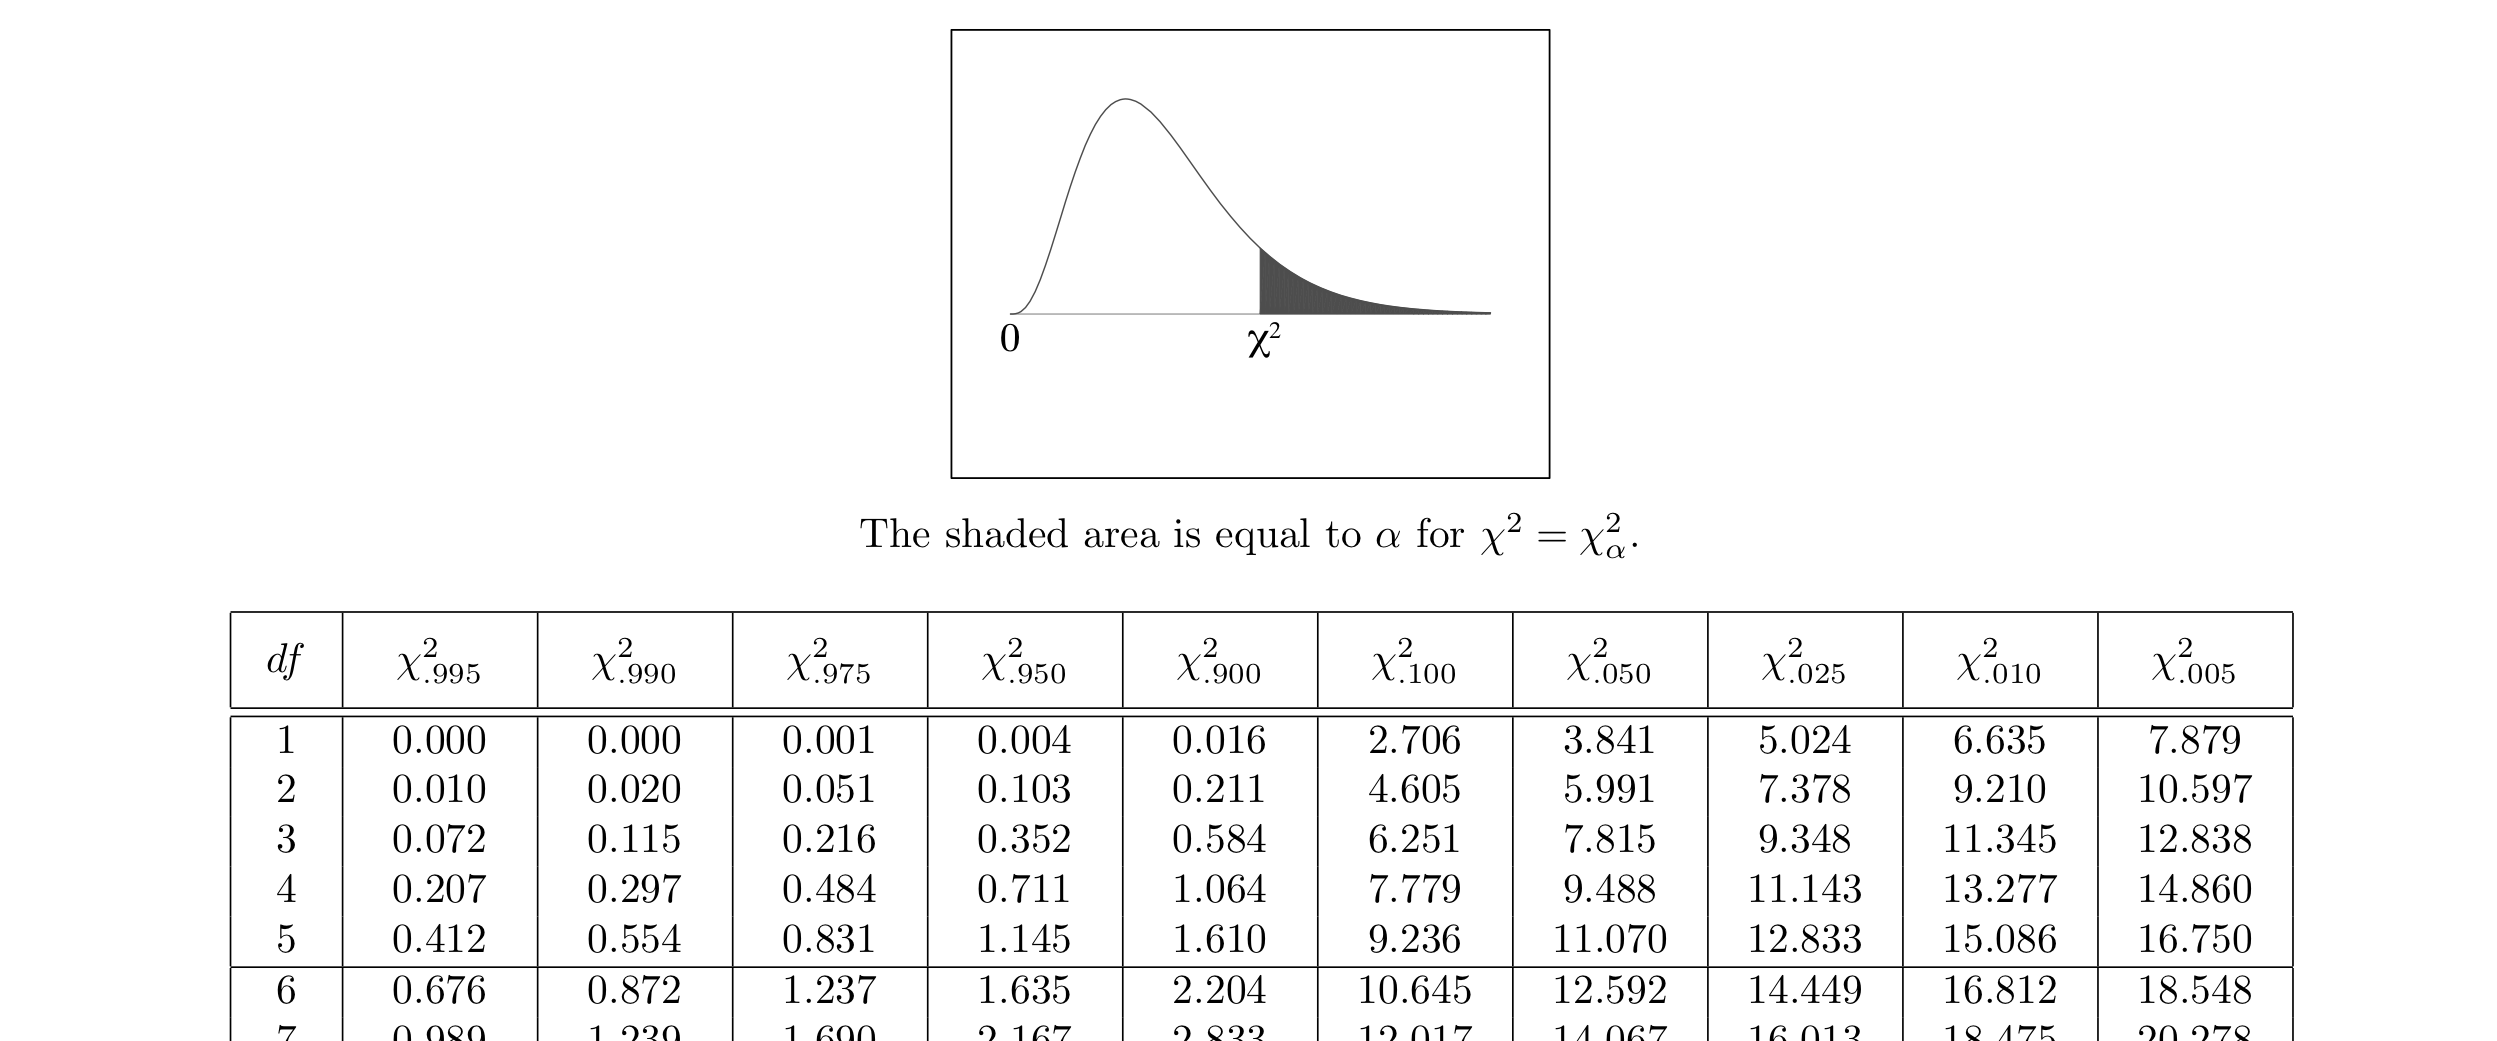

#### Example 6.2

Determine the $90\%$ confidence interval on the variance for the situation described in example
$6.1$.

#### Solution

$\chi_{\alpha/2,n-1}^2 = \chi_{0.05,98}^2 = 76.1$ (Chi-square distribution table, appendix)

$\chi_{1-\alpha/2,n-1}^2 = \chi_{0.95,98}^2 = 122.1$ ( Chi-square distribution table, appendix )

$L = \frac{(n-1)s_x^2}{\chi_{1−\alpha/2,n-1}^2} = \frac{98(22.32)^2}{122.1} = 400$

$U = \frac{(n-1)s_x^2}{\chi_{\alpha/2,n−1}^2} = \frac{98(22.32)^2}{76.1} = 642$

The $90\%$ confidence intervals for the variance are found to be 400 to 642. 

Or: The $90\%$ confidence intervals for the standard deviation are found (by taking the square roots of the above limits) to be $20$ to $25$.

### Confidence intervals for proportions/probabilities

Sometimes we are interested to know what fraction of the population has a certain characteristic.
Since we cannot examine the whole population, we choose a random sample (sample size$=n$), and
examine what proportion ($\hat{p}$) of this sample bares this characteristic. The confidence interval
population proportion is calculated as:

$$P = \hat{p} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

Here, the standard deviation of $\hat{p}$ is derived assuming that the underlying random variable follows the binomial distribution.

Note that when the sample size increases, then $P$ approaches $\hat{p}$, which means that the sample estimate
becomes more reliable.

#### Example 6.3

$500$ volunteers participated in a drug test, $8$ of which reported a particular side effect.

a) Find the $95\%$ confidence interval for the population of all people that are going to use this drug
to have the same side effect.


#### Solution

$\hat{p} = \frac{8}{500} = 0.016$

$z_{1-\frac{\alpha}{2}} = z_{1-\frac{1-0.95}{2}} = z_{0.975} = 1.96$ (from normal distribution table)

a) $n = 500$

$$P = \hat{p} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} = 0.016 \pm 1.96\sqrt{\frac{0.016(1−0.016)}{500}}$$

$$\Rightarrow P = (0.005, 0.027)$$

We are $95\%$ confident that the drug will have side effects on $0.5$ to $2.7$ percent of the whole
population that will use it.


#### Question b

b) Find the number of volunteers needed, so that we are $95\%$ confident that the **estimate for the
population proportion** will not exceed the **estimate for the sample proportion** with more than $0.5\%$

#### Solution

$$P - \hat{p} = z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq 0.005 $$

$$n \geq \left(\frac{z_{0.975}}{0.005}\right)^2 \cdot 0.016 \cdot (1-0.016) = 2420 $$

$$\Rightarrow P = 0.016 \pm 0.005 = (0.011,0.021) $$

After testing the drug on at least $2420$ people, we will be $95\%$ confident that the drug will have side
effects on not more than $2.1\%$ of the whole population that will use it.

### Properties of confidence intervals

- Ideal situation – high confidence and small margin of error
- Margin of error for estimations of $\mu$: $E = \frac{z_{\alpha/2}\sigma}{\sqrt{n}}$ 
- The margin error equation can also be used to estimate sample size in order to achieve a given margin of error:

$$n = \left(\frac{z_{\alpha/2}\sigma}{E}\right)^2$$

- **Properties of $E$**

    - **Error increases with smaller sample size:** 
        For any confidence level, large samples reduce the margin of error (sample size)
    - **Error increases with larger standard Deviation:** 
        As variation among the individuals in the population increases, so does the error of our
        estimate (data behavior)
    - **Error increases with larger z values:**
        Tradeoff between confidence level and margin of error (significance level)

## Hypothesis testing

Hypothesis tests are procedures for making rational decisions about the reality of
effects (using C.I.s).
There are only two possible outcomes of this test: reject $H_0$, or don't. The risk of falsely rejecting $H_0$ is known.

So we're interested in testing the statistical significance -- which differs from physical significance. Sometimes, even though the difference between two variables is physically insignificant, we might find it's statistically significant, given large enough samples.

<IPython.core.display.Javascript object>


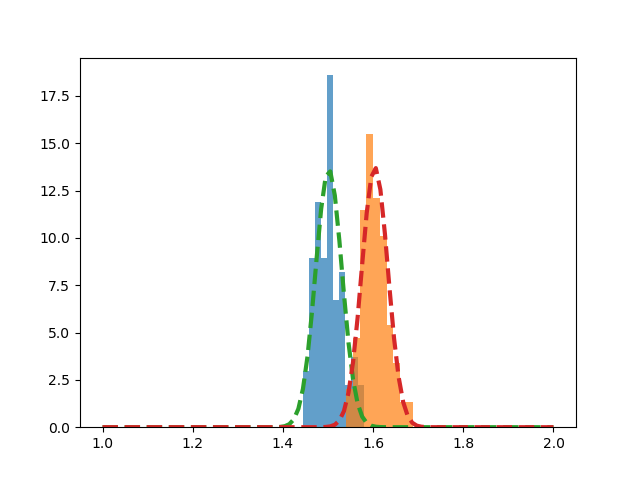

In [9]:
#sampling distribution of the means of two random variables

mean_rv1, mean_rv2= [],[]
for i in range(100):
    rv1 = np.random.normal(loc=1.5, scale=0.9, size=1000)
    mean_rv1.append(np.mean(rv1))
    
    rv2 = np.random.normal(loc=1.6, scale=.9, size=1000)
    mean_rv2.append(np.mean(rv2))

plt.hist(mean_rv1, normed = True, alpha=0.7)
plt.hist(mean_rv2, normed = True, alpha=0.7)

x = np.linspace(1,2,100)
plt.plot(x, stats.norm.pdf(x, np.mean(mean_rv1), np.std(mean_rv1)), '--', linewidth=3, label='Sampling dist rv1')
plt.plot(x, stats.norm.pdf(x, np.mean(mean_rv2), np.std(mean_rv2)), '--', linewidth=3, label='Sampling dist rv2')

(1) **Definitions:**

- **Hypotheses:**
    - *Null Hypothesis* $H_0$: The accepted explanation, the basis of argument, the status quo. This is what we're trying to reject.
    - *Alternate Hypothesis* $H_a$ : What the researcher or scientist thinks might really be going on, a (possibly) better explanation than the null hypothesis. It's a statement of what a statistical hypothesis test is set up to establish.
    - Can be rejected or not rejected, but not proven.
- **Test:**
    - The goal of the test is to reject $H_0$ in favor of $H_a$ . We do this by calculating a *test statistic* and comparing its value with a value from a table in the book, the *critical value*.
    - If our test statistic is more extreme than our critical value, then it falls within the *rejection region* of our test and we reject $H_0$ . We can set up the rejection region before computing our test statistic with a chosen *significance level* $\alpha$.
- **Decisions:**
    - made about the population on the basis of sample information
    - Reject $H_0$.
    - Fail to reject $H_0$.
- **Errors:**
    - Type I: Reject $H_0$ when $H_0$ is really true.
    - Type II: Fail to reject $H_0$ when $H_0$ is really false.
- **Probability value (p-value)** is the probability of wrongly rejecting the *null hypothesis* if it is in fact true.
    - Reject the *null hypothesis* if the p-value is less than $\alpha$
    - The smallest fixed level at which the null hypothesis can be rejected
- **Parametric tests:**
    - When we test the mean, both one sample test and two sample test, we used either Z-test (when we assume the variance is known) or T-test (when the variance is unknown).
- **The basic assumptions of these tests are:**
    - Normality – the population from which the samples are drawn was assumed to be normally distributed.
    - Homogeneity of variance – the variance of the population from which the samples are drawn was assumed to be constant.
    - Independence – each individual score is assumed not to be influenced by any other score.
- **Since these assumptions are often violated to some degree, the tests become approximate tests **

(2) ** Procedure - steps **

1. formulate the null hypothesis, $H_0$, to be tested

    - it needs to be formulated without having seen the specific data used to evaluate it
    - this may be problematic especially if new data accumulates slowly
    
2. formulate the alternative hypothesis, $H_a$
3. determine a test statistic
4. determine the distribution of the test statistic
5. define the rejection region or critical region of the test statistic
6. calculate the test statistic
7. determine if the calculated value of the test statistic falls in the rejection region of the distribution of the test statistic

> **Question:** Water samples are taken from water used for cooling as it is being discharged from a power plant into a river. It has been determined that as long as the mean temperature of the discharged water is at most 150 degrees Fahrenheit, there will be no negative effects on the river’s ecosystem. To investigate whether the plan is in compliance with the regulations that prohibit a mean discharge water temperature above 150 degrees, 50 water samples will be taken at randomly selected times, and the temperatures of each sample recorded. Which of the following hypothesis tests should be used?
   * (a) $H_0: \mu \ge 150$ versus $H_A: \mu<150$
   * (b) $H_0: \mu \le 150$ versus $H_A: \mu>150$

#### (3) One sample, two-tailed

** Z-test:**

* Test if the mean of a normal distribution is $\mu_0$, knowing that the variance is $\sigma^2$.

#### Solution

Hypothesis: $H_0\text{:} \ \ \mu = \mu_0 \ \ \text{against} \ \ H_a\text{:} \ \  \mu \neq \mu_0 $

Get a sample and calculate the mean and standard deviation $(\bar{x},\sigma_x^2)$

Test statistic: $$Z = \frac{(\bar{x}-\mu_0)}{\sigma_{\bar{x}}}$$

$H_0$ is rejected if $$|Z| = \left| \frac{(\bar{x}-\mu_0)}{\sigma_{\bar{x}}} \right| > z_{1-\alpha/2}  $$

Equivalent to saying that $\bar{x}$ is outside of the confidence interval, i.e.: 

$$ \bar{x} < \mu_0 - z_{1-\alpha/2}\sigma_{\bar{x}}$$

or

$$\bar{x} > \mu_0 + z_{1-\alpha/2}\sigma_{\bar{x}} $$

** T-test:**

* Test if the mean of a normal distribution is $\mu_0$, with unknown variance.

$$H_0\text{:} \ \ \mu = \mu_0, \ \  H_a\text{:} \ \ \mu \neq \mu_0 $$

$$t = \frac{(\bar{x}-\mu_0)}{s_{\bar{x}}} $$

$H_0$ is rejected if: 

$$|t| = \left| \frac{(\bar{x}-\mu_0)}{s_{\bar{x}}} \right| > t_{1-\alpha/2} $$

#### Example 6.4

The annual runoff for a station for the period $1953$-$1970$ has been calculated as $14.65$cm and the
standard deviation $4.75$cm. Test the hypothesis that the true mean annual discharge is $16.5$cm.

#### Solution 

Assume normal distribution and unknown variance since $n$ is small.

$$H_0\text{:} \ \ \mu = 16.5; \ \ \ \ \ \ \ \ \ \ H_a\text{:} \ \ \mu \neq 16.5 $$

$$t = \frac{(\bar{x}-\mu)}{s_{\bar{x}}} = \frac{(14.65 − 16.5)}{4.75/\sqrt{18}} = -1.65 $$

Using $\alpha = 5\%$ and $t_{1 − \alpha/2,n-1} = t_{0.975,17} = 2.11$ (from appendix, table A13). Since $|t| < t_{1 − \alpha/2,n-1} $ we do not reject the hypothesis that the true mean might be $16.5$.

(4) **Errors and power in hypothesis testing**

| Decision     | Hypothesis true |Hypothesis false|
| ------------- |:-------------:| -----:|
| Reject      |Type I error | No error |
| Don't reject      | No error      |   Type II error |

- Type I error = significance level, $\alpha$
- Type II error is denoted by $\beta$. The exact probability of a type II error is generally unknown. A type II error is frequently due to sample sizes being too small.
- Power of hypothesis test - measures the test's ability to reject the null hypothesis when it is actually false - that is, to make a correct decision. In other words, the power of a hypothesis test is the probability of not committing a __type II error__. It is calculated by subtracting the probability of a type II error from $1$, usually expressed as:

$$\text{Power} = 1-P(\text{type II error}) = 1-\beta $$

**The maximum power a test can have is $1$, the minimum is $0$**.

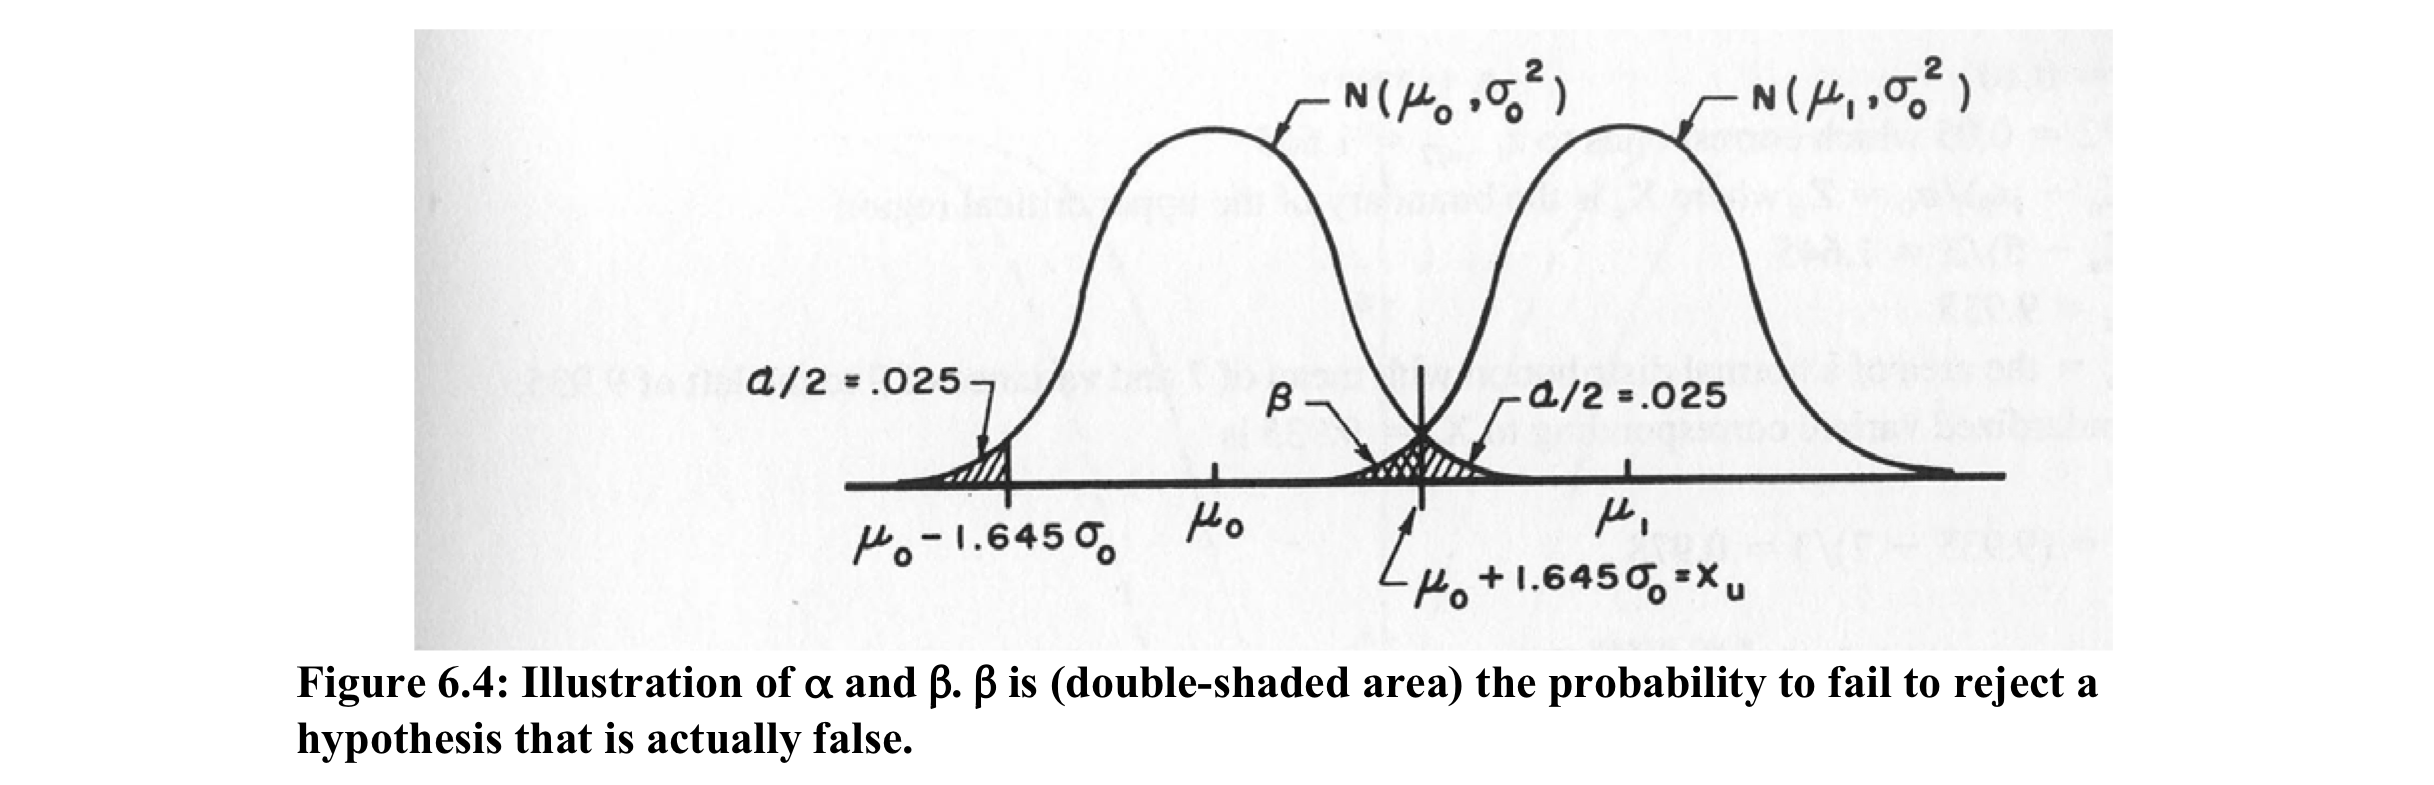

### Factors Affecting Type II Error

- True value of population parameter
    - $\beta$ Increases when the difference between hypothesized parameter and its true value decrease
- Significance level
    - $\beta$ increases when $\alpha$ decreases
- Population standard deviation
    - $\beta$ increases when $\sigma$ increases
- Sample size
    - $\beta$ increases when $n$ decreases

(5) **More examples of hypothesis testing**

#### One sample, one tail. Test on mean, normal distribution
- appropriate if there is a prior (e.g., a physically based) reason to expect that violations of the null hypothesis will lead to values of the test statistic on a particular side of the null distribution
- e.g. if the test statistic involves a squared difference, only right-tail probabilities would be of interest

(a) Known variance:

$$H_0\text{:} \ \ \mu = \mu_1, \ \ H_a\text{:} \ \ \mu = \mu_2 $$

or

$$H_0\text{:} \ \ \mu = \mu_0, \ \ H_a\text{:} \ \ \mu > \mu_0 \ \ \text{or} \ \ \mu < \mu_0 $$

$$Z = \frac{\bar{x}-\mu_1}{\sigma_{\bar{x}}} $$

If $\mu_1 > \mu_2$ , then $H_0$ is rejected if:

$$\bar{x} \geq \mu_1 + z_{1 − \alpha}\sigma_\bar{x} $$

(b) Unknown variance:

$$H_0\text{:} \ \ \mu = \mu_1, \ \ H_a\text{:} \ \ \mu = \mu_2 $$

or

$$H_0\text{:} \ \ \mu = \mu_0, \ \ H_a\text{:} \ \ \mu > \mu_0 \ \ \text{or} \ \ \mu < \mu_0 $$

Test statistic:

$$t = \frac{(\bar{x}-\mu_1)}{s_{\bar{x}}} $$

If $\mu_1 > \mu_2$ , then $H_0$ is rejected if:

$$\bar{x} \leq μ_1 − t_{1 − \alpha, n−1}s_\bar{x}$$

If $\mu_1 < \mu_2$ , then $H_0$ is rejected if:

$$\bar{x} \geq μ_1 + t_{1 − \alpha, n−1}s_\bar{x}$$

#### Example 6.6

The annual runoff for a station for the period $1953$-$1970$ has been calculated as $14.65$cm and the
standard deviation $4.75$cm. Can the mean annual discharge be $16.5$ in reality? (i.e. can the
population mean be $16.5$ instead of $14.65$ as sample shows).

#### Solution

$\alpha = 5\%$, $n=18$

Assume normal distribution and unknown variance since $n$ is small.

$$H_0\text{:} \ \ \mu = \mu_1 = 16.5; \ \ \ \ \ \ \ \ \ H_\alpha\text{:} \ \ \mu = \mu_2 = 14.65; \ \ \mu_1>\mu_2$$

$$t = \frac{(\bar{x}-\mu)}{s_{\bar{x}}} = \frac{(14.65 − 16.5)}{4.75/\sqrt{18}} = -1.65$$

$t_{1−\alpha,n−1} = t_{0.95,17} = −1.74$ (from appendix, table A13):

$$\mu_1 - t_{1−\alpha,n−1}\cdot s_\bar{x} = 16.5 - 1.74\cdot \frac{4.75}{\sqrt{18}} = 14.55$$

$$\Rightarrow \bar{x} > \mu_1 - t_{1−\alpha,n−1}\cdot s_\bar{x} $$

Thus, we do not reject the hypothesis that the population mean may be $16.5$

Compare with the previous example, here we test if the mean $16.5$ instead of $14.65$, in the
previous example, we test if the mean is $16.5$ nothing else..

#### Two-sample, two-tail

- if the means of two normal distributions are significantly different
- used for the general alternative hypothesis "$H_0$ is not true"
- rejection region is split to both left and right tails of the null distribution
- a test statistic must be further out on the tail (i.e., more unusual with respect to $H_0$) to be declared significant in a two-tailed test as compared to a one-tailed test, at a specified test level


(a) Known variances:

$$x_1 \sim N(\mu_1,\sigma_1^2) \ \ \ \ x_2 \sim N(\mu_2,\sigma_2^2)$$

$$H_0\text{:} \ \ \mu_1-\mu_2 = \delta, \ \ H_a\text{:} \ \ \mu_1-\mu_2 \neq \delta; \ \ \delta = 0$$

Test statistic:

$$ z=\frac{(\bar{x}_1-\bar{x}_2-\delta)}{\sqrt{(\sigma_1^2/n_1+\sigma_2^2/n_2)}}$$

$H_0$ rejected if: 

$$ |z| > z_{1-\alpha/2} $$

(b) Unknown variances:

Test statistic:

$$ t=\frac{(\bar{x}_1-\bar{x}_2-\delta)}{\sqrt{(s_1^2/n_1+s_2^2/n_2)}}$$

$H_0$ rejected if: 

$$|t| > \frac{w_1t_1+w_2t_2}{w_1+w_2}$$

where:

$$w_1 = \frac{s_1^2}{n_1} $$

$$w_2 = \frac{s_2^2}{n_2} $$

$$t_1 = t_{1-\alpha/2,n_1-1}$$

$$t_2 = t_{1-\alpha/2,n_2-1}$$

#### One sample, two tail test for the variance of normal distribution

$$H_0\text{:} \ \ \sigma^2 = \sigma_0^2; \ \ \ \ \ \ H_a\text{:} \ \ \sigma^2 \neq \sigma_0^2$$

Test statistic:

$$\chi_c^2 = \sum_{i=1}^n \frac{(x_i-\bar{x})^2}{\sigma_0^2} = \frac{(n-1)S^2}{\sigma_0^2}$$

$H_0$ rejected if: 

$$\chi_c^2 > \chi_{1-\alpha/2,n-1}^2$$

or

$$\chi_c^2 < \chi_{\alpha/2,n-1}^2$$

#### Example 6.7

For the example 6.6 test the hypothesis that the variance is 36.

#### Solution

$$H_0\text{:}\ \ \sigma^2 = \sigma_0^2 = 36; \ \ \ \ \ \ H_a\text{:}\ \ \sigma^2 \neq \sigma_0^2$$

Then

$$\chi_c^2 = \sum_{i=1}^n \frac{(x_i-\bar{x})^2}{\sigma_0^2} = \frac{(n-1)S^2}{\sigma_0^2} = \frac{17(4.75)^2}{36} = 10.65$$

From a Chi-square table:

$$\chi_{\alpha/2,n-1}^2 = \chi_{0.025,17}^2 = 7.6$$

$$\chi_{1-\alpha/2,n-1} = \chi_{0.975,17}^2 = 30.2$$

Since $10.65$ is neither smaller than $7.6$ nor bigger than $30.2$, $H_0$ is not rejected.

#### Example 6.5

Assume a single observation is selected from a normal distribution with mean $\mu=7$ and variance $\sigma_0^2 =9$. It is hypothesized that $\mu=\mu_0=5$. If the test is conducted at the $10\%$ significance level, what is $\beta$?

#### Solution

$\alpha/2 = 0.05$ , which corresponds to $z_{1-\frac{\alpha}{2}} = 1.645$

$(X_u - \mu_0)/s = z_{1-\alpha/2}$, where  $X_u$ is the boundary of the upper critical region

$(X_u-5)/3 = 1.645$

$X_u = 9.935$

$A_u=$ the area of a normal distribution with mean of $7$ and variance $9$ to the left of $9.935$.

The standardized variate corresponding to $X_u = 9.935$ is:

$$z_\mu = (9.035 – 7)/3 = 0.978 $$

The area to the left of $z_u = 0.978$ from a standard normal distribution is $0.8365$.

Similarly, if $X_l$ is the boundary of the lower critical region, we have:

$$(x_l-5)/3=-1.645=0.0645 $$

$A_l$ is the area of a normal distribution with mean $7$ and variance $9$ to the left of $0.0645$.

$$z_l =(0.0645 -7)/3= -2.31$$

$$A_l =0.0104$$

Now, $\beta = A_u – A_l = 0.8365 – 0.0104 = 0.8261$.

Thus, the probability of accepting the hypothesis that $\mu=5$ when in fact $\mu=7$ is $0.8261$ when $\alpha$ is $0.1$. The probability of Type II error is $0.8261$.

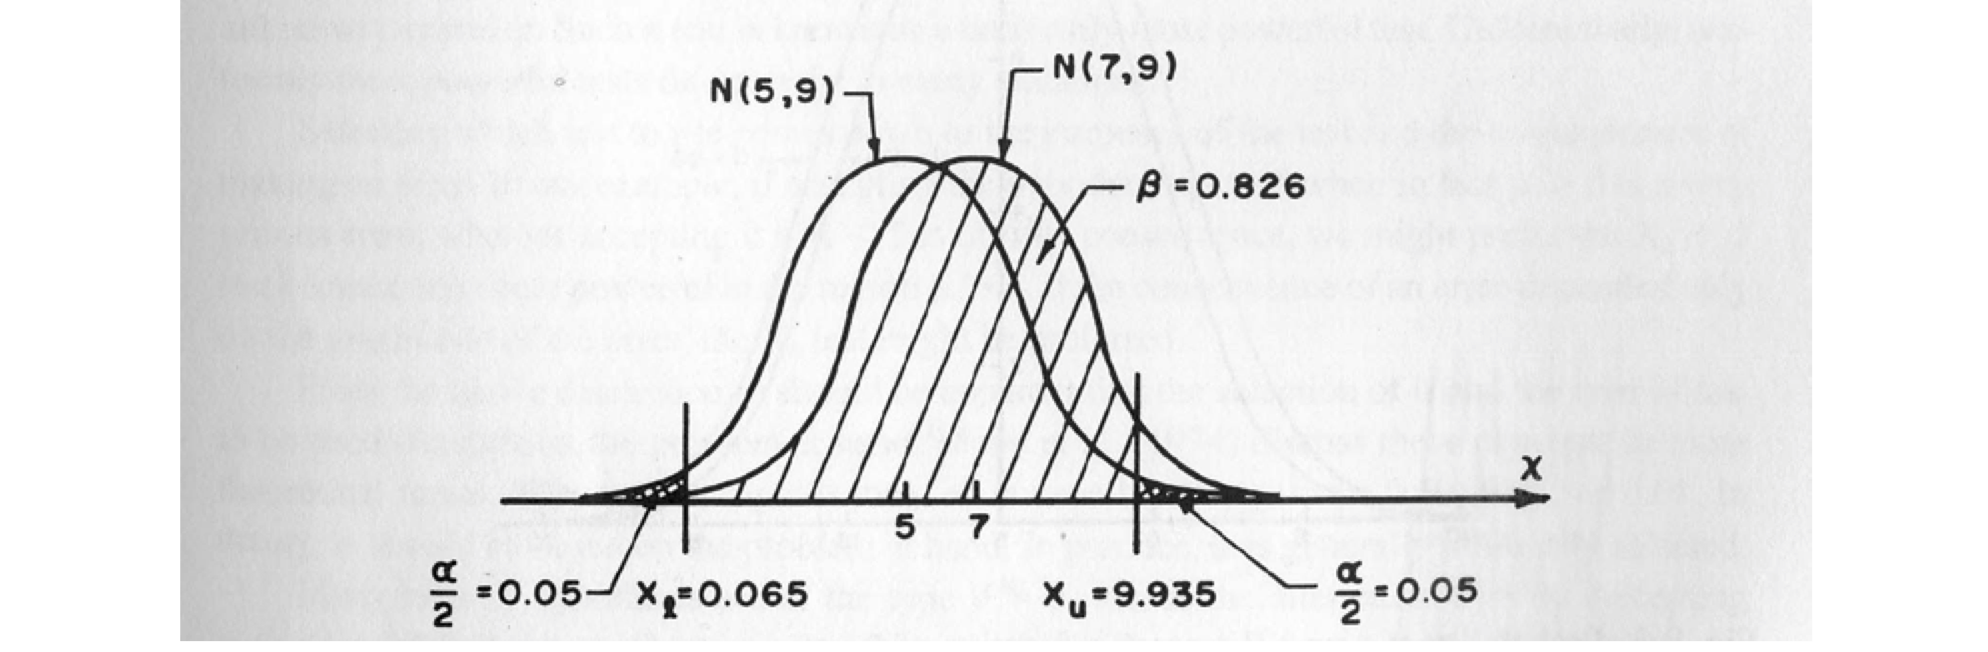

### The F-test

Testing whether two samples come from populations with the same variance.

Used to test a null hypothesis that the variance of one population is equal to that of a second population $\sigma_{\text{pop}1}^2 = \sigma_{\text{pop}2}^2$

$$H_0\text{:} \ \ \sigma_1^2 = \sigma_2^2; \ \ \ \ \ \ H_a\text{:} \ \ \sigma_1^2 \neq \sigma_2^2$$

The F statistic is a simple ratio of the two unbiased estimator of population variance:

$$F_c = \frac{s_1^2}{s_2^2}$$

where F is distributed as F distribution with $n_1-1$ and $n_2-1$ degrees of freedom, and $s_1^2 > s_2^2$.

The F value will be close to one if the variances of two populations are equal or close.

$H_0$ is rejected if:

$$F_c > F_{1-\alpha,n_1-1,n_2-1} \ \ \text{(table A15)}$$



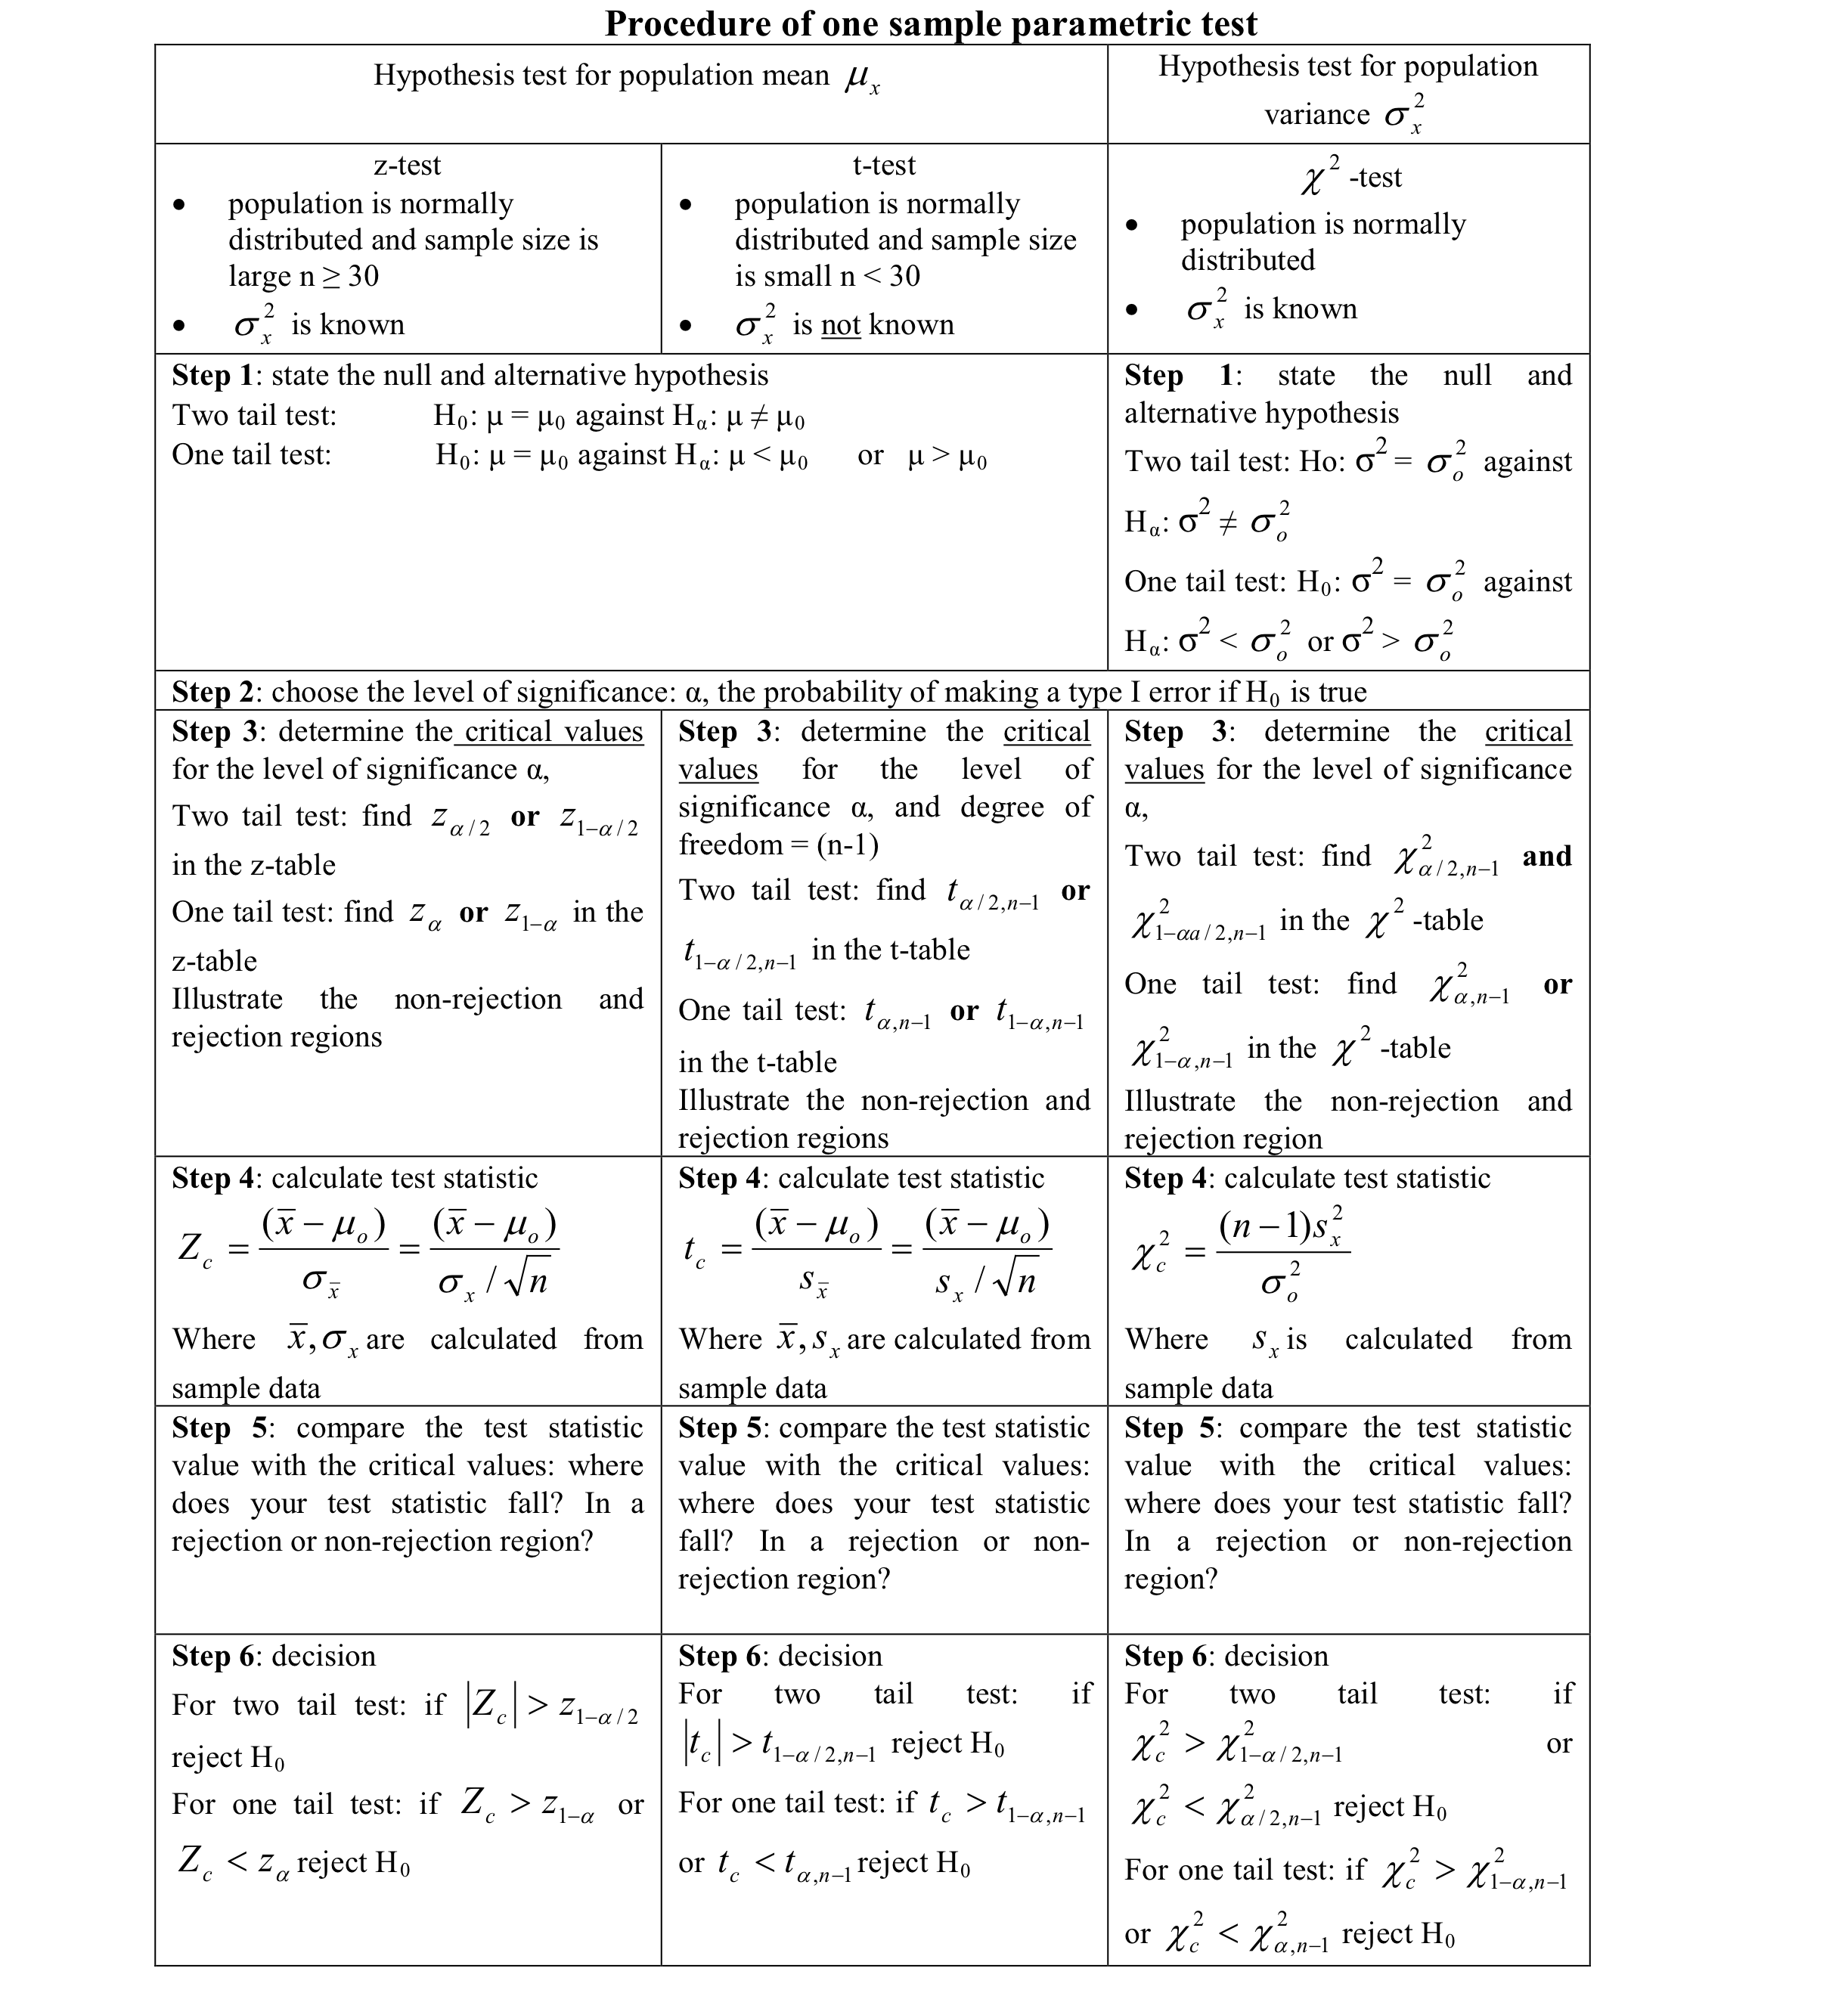